<a href="https://colab.research.google.com/github/danielarenee/Graph-Theory-Algorithms/blob/main/3_Algoritmos_Secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio: ¿Puedes probar que la Recursión sea más tardada que los loops? Usa el ejemplo del triángulo de Pascal y adapta tu código para que mida tiempos de ejecución. Para observar diferencias notables, calcula la n-ésima fila, para una n lo suficientemente grande.

Agrega una explicación en texto y carga en formato pdf tu respuesta en Blackboard.

### **Recursión vs Loops en el triángulo de Pascal**

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Recursivo
def factorial_recursivo(num):
    if num > 0:
        return int(num * factorial_recursivo(num-1))
    else:
        return 1

def pascal_recursivo(num):
    row = []
    for j in range(0, num+1):
        combinacion = factorial_recursivo(num) // (factorial_recursivo(j) * factorial_recursivo(num-j))
        row.append(combinacion)
    return row

# Loops
def factorial_loop(num):
    if num <= 0:
        return 1
    resultado = 1
    for i in range(1, num + 1):
        resultado *= i
    return resultado

def pascal_loop(num):
    row = []
    for j in range(0, num+1):
        combinacion = factorial_loop(num) // (factorial_loop(j) * factorial_loop(num-j))
        row.append(combinacion)
    return row




Cálculo de la fila 5:
  Recursión:   0.000009 segundos
  Iterativo:   0.000004 segundos
  Recursión es 2.0x más lenta que iterativo

Cálculo de la fila 10:
  Recursión:   0.000022 segundos
  Iterativo:   0.000010 segundos
  Recursión es 2.2x más lenta que iterativo

Cálculo de la fila 20:
  Recursión:   0.000091 segundos
  Iterativo:   0.000035 segundos
  Recursión es 2.6x más lenta que iterativo

Cálculo de la fila 50:
  Recursión:   0.000593 segundos
  Iterativo:   0.000380 segundos
  Recursión es 1.6x más lenta que iterativo

Cálculo de la fila 100:
  Recursión:   0.003117 segundos
  Iterativo:   0.000792 segundos
  Recursión es 3.9x más lenta que iterativo


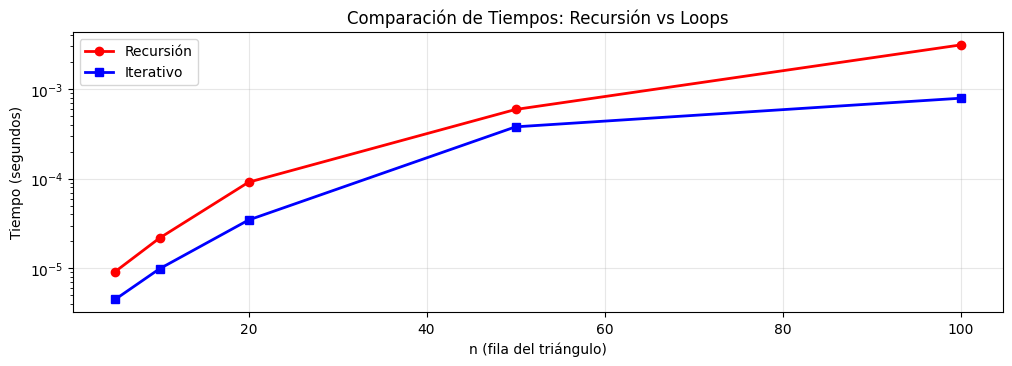

In [28]:

def medir_tiempo(funcion, argumento, repeticiones=5): #tiempo promedio de ejecución
    tiempos = []
    for _ in range(repeticiones):
        start = time.time()
        funcion(argumento)
        end = time.time()
        tiempos.append(end - start)
    return sum(tiempos) / len(tiempos)

# Prueba

valores_n = [5, 10, 20, 50, 100]
resultados = []


for n in valores_n:
    print(f"\nCálculo de la fila {n}:")

    # recursivo
    tiempo_rec = medir_tiempo(pascal_recursivo, n, repeticiones=5)

    # iterativo
    tiempo_iter = medir_tiempo(pascal_loop, n, repeticiones=5)

    # resultados
    resultado = {
        'n': n,
        'tiempo_recursivo': tiempo_rec,
        'tiempo_iterativo': tiempo_iter,
    }
    resultados.append(resultado)

    # mostrar resultados:
    print(f"  Recursión:   {tiempo_rec:.6f} segundos")
    print(f"  Iterativo:   {tiempo_iter:.6f} segundos")

    ratio = tiempo_rec / tiempo_iter
    print(f"  Recursión es {ratio:.1f}x más lenta que iterativo")

# Graficar

df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(12, 8))

# Comparación de tiempos
plt.subplot(2, 1, 1)

plt.semilogy(df_resultados['n'], df_resultados['tiempo_recursivo'], 'r-o', label='Recursión', linewidth=2)
plt.semilogy(df_resultados['n'], df_resultados['tiempo_iterativo'], 'b-s', label='Iterativo', linewidth=2)

plt.xlabel('n (fila del triángulo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de Tiempos: Recursión vs Loops')
plt.legend()
plt.grid(True, alpha=0.3)




*   La recursión es más lenta que el método iterativo, y la diferencia entre ambas crece conforme aumenta n
*   Cada vez que se llama a una función recursiva, la computadora tiene que guardar información extra sobre dónde estaba antes, lo que toma tiempo y memoria adicional
*   La implementación recursiva calcula los mismos factoriales muchas veces
*   Con recursión se necesitan hacer n llamadas mientras que con loops solo se necesita un ciclo

Ambos métodos hacen básicamente el mismo número de operaciones matemáticas pero la recursión añade trabajo extra que hace todo más lento, Si se usan números muy grandes (n>200) la recursión se queda sin memoria y el programa se rompe, pero los loops siguen funcionando